In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

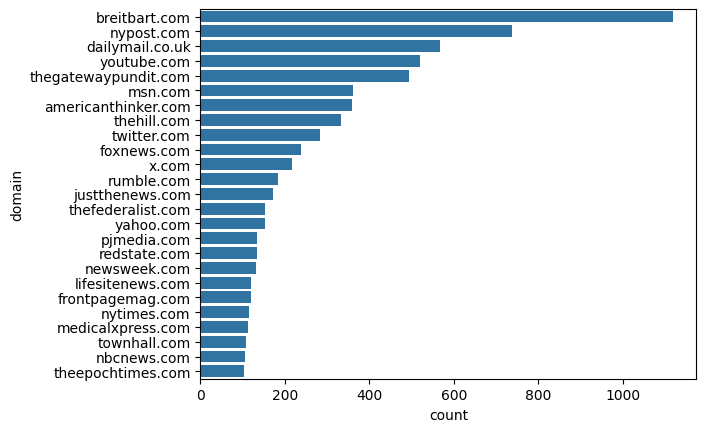

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

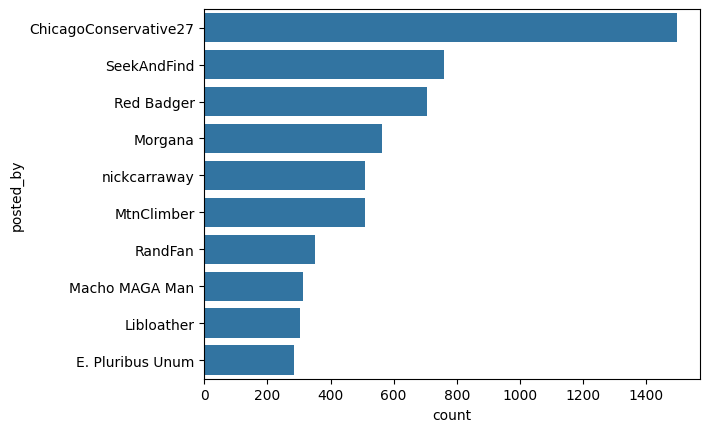

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_55149/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain         \
                                            count unique   
domain               posted_by                             
americanthinker.com  E. Pluribus Unum           1      1   
                     MtnClimber               193      1   
                     Red Badger                 1      1   
                     SeekAndFind              133      1   
breitbart.com        E. Pluribus Unum          28      1   
                     MtnClimber                 1      1   
                     Red Badger                 4      1   
                     ChicagoConservative27    922      1   
                     Macho MAGA Man            10      1   
                     Morgana                   25      1   
dailymail.co.uk      Red Badger                10      1   
                     SeekAndFind                1      1   
                     ChicagoConservative27      2      1   
                     Macho MAGA Man             4      1   
                     Morgana                  114      1   
                     Libloather                70      1   
                     RandFan                    4      1   
                     nickcarraway               3      1   
foxnews.com          MtnClimber                 1      1   
                     Red Badger                 3      1   
                     SeekAndFind                2      1   
                     ChicagoConservative27     12      1   
                     Macho MAGA Man             2      1   
                     Morgana                    1      1   
                     Libloather                62      1   
                     RandFan                    2      1   
                     nickcarraway               7      1   
frontpagemag.com     E. Pluribus Unum          22      1   
                     MtnClimber                 6      1   
justthenews.com      E. Pluribus Unum          41      1   
                     MtnClimber                11      1   
                     Red Badger                25      1   
                     SeekAndFind                1      1   
lifesitenews.com     Morgana                   11      1   
msn.com              SeekAndFind               30      1   
                     ChicagoConservative27      9      1   
                     Libloather                10      1   
                     RandFan                   14      1   
                     nickcarraway              20      1   
nbcnews.com          Red Badger                 3      1   
                     SeekAndFind                1      1   
                     ChicagoConservative27      4      1   
                     Morgana                    4      1   
                     nickcarraway               7      1   
newsweek.com         Red Badger                 5      1   
                     ChicagoConservative27      5      1   
                     Macho MAGA Man             2      1   
                     Morgana                    1      1   
                     Libloather                 7      1   
                     nickcarraway               9      1   
nypost.com           E. Pluribus Unum          11      1   
                     MtnClimber                 2      1   
                     Red Badger                 6      1   
                     SeekAndFind                5      1   
                     ChicagoConservative27    275      1   
                     Macho MAGA Man             1      1   
                     Morgana                    2      1   
                     Libloather                81      1   
                     RandFan                    2      1   
                     nickcarraway              92      1   
nytimes.com          E. Pluribus Unum           7      1   
                     RandFan                    2      1   
pjmedia.com          MtnClimber                 1      1   
                     Red Badger                 3      1   
                     Se

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_55149/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
Breaking: Verdict Reached in NYC trial [Guilty on all 34 Counts],2024-05-30 22:06:03,511.0
"New York Jury Reaches Verdict on Trump’s NY Lawfare Trial—- GUILTY VERDICTS – 1-5, 13, 14, 19, 20, 24, 26, 30, 31, 34, — EACH COUNT COULD HAVE 4 YEARS IN PRISON!",2024-05-30 23:50:50,350.0
Iran Attacks Israel - LIVE Breaking News Coverage,2024-04-13 22:56:05,270.0
Breaking: Verdict Reached in NYC trial,2024-05-30 21:15:27,252.0
"FReeper Canteen ~ Tunes For Our Troops: ""Numbers"" Music ~ 27 April 2024",2024-04-27 06:19:18,188.0
The state of discourse on Free Republic,2024-06-09 00:07:02,187.0
Iran launches attack against Israel using dozens of drones,2024-04-13 22:21:27,186.0
Was America Evil to Drop Atomic Bombs on Japan?,2024-05-05 10:54:04,177.0
"Pro-life conservatives are 'disappointed' in Trump's new abortion policy, but stick by him: 'only one option'",2024-04-08 21:29:13,176.0
